In [1]:
from simulated_data_generator import SimulatedDataGenerator
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt

In [4]:
number_of_variables = 256
number_of_samples = 1024
correlation_proportions = [0.25, 0.25, 0.5]
correlation_edges = np.cumsum(correlation_proportions) * number_of_variables

In [5]:
generator = SimulatedDataGenerator(number_of_variables,
                                   positive_correlated=correlation_proportions[0],
                                   negative_correlated=correlation_proportions[1],
                                   uncorrelated=correlation_proportions[2])

x, missing_flag, y = generator.generate_data_logistic(number_of_samples)

In [6]:
correlation_values = np.zeros(number_of_variables)
for variable_idx in range(number_of_variables):
    feature_vector = x[:, variable_idx]
    correlation_value, _ = pearsonr(feature_vector, y)
    correlation_values[variable_idx] = correlation_value

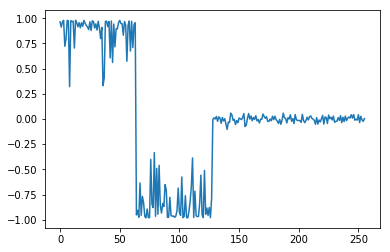

In [7]:
plt.figure()
plt.plot(np.arange(number_of_variables), correlation_values)
plt.show()